# TP1 : Classification de voyelles par lois gaussiennes
NOM - PRÉNOM : LANTRADE MORGAN

Déposer le notebook sur Moodle à la fin de la séance

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

### Vérification des données


In [2]:
#1- Charger les données d'apprentissage avec le code suivant :
f = open('APP.pkl', 'rb')
dicoAPP = pickle.load(f)
app_aa = dicoAPP["aa"]
app_ii = dicoAPP["ii"]
app_uu = dicoAPP["uu"]
f.close()

# Vérifier le contenu et la taille des matrices
print(app_aa.shape)
print(app_ii.shape)
print(app_uu.shape)
# Il s'agit de matrices 80x2 résultant d'une ACP sur une paramétrisation cepstrale (cf. cours M1 !).

(80, 2)
(80, 2)
(80, 2)


In [3]:
# 2- Afficher sur une seule figure, en utilisant subplot(nb_lignes, nb_colonnes, numero_trace), 
# l'histogramme de chacune des classes : aa, uu et ii.

def show_hist(matrices,legends,colors):
    '''Affiche selon une liste des param cesptraux de classes,une liste de legendes et de couleurs
    l'histogramme des classes composantes par composantes'''
    nb_class=len(matrices)
    nb_comp=matrices[0].shape[1]
    plt.figure(figsize=(4*nb_comp, 3*nb_comp))  # taille figure
    
    for comp in range(nb_comp):
        # Déterminez la plage commune des valeurs sur l'axe des x pour les trois classes
        min_value = min([ np.min(matrix[:,comp] ) for matrix in matrices ] )
        max_value = max([ np.max(matrix[:,comp] ) for matrix in matrices ] )
        
        for cl in range(nb_class):
            plt.subplot(nb_class, nb_comp, comp+1+cl*nb_comp)
            plt.hist(matrices[cl][:, comp],color=colors[cl], bins=30,range=(min_value, max_value), alpha=0.7,edgecolor='black')
            plt.title(f'Classe {legends[cl]} composante {comp+1}')

    plt.tight_layout()

    plt.show()


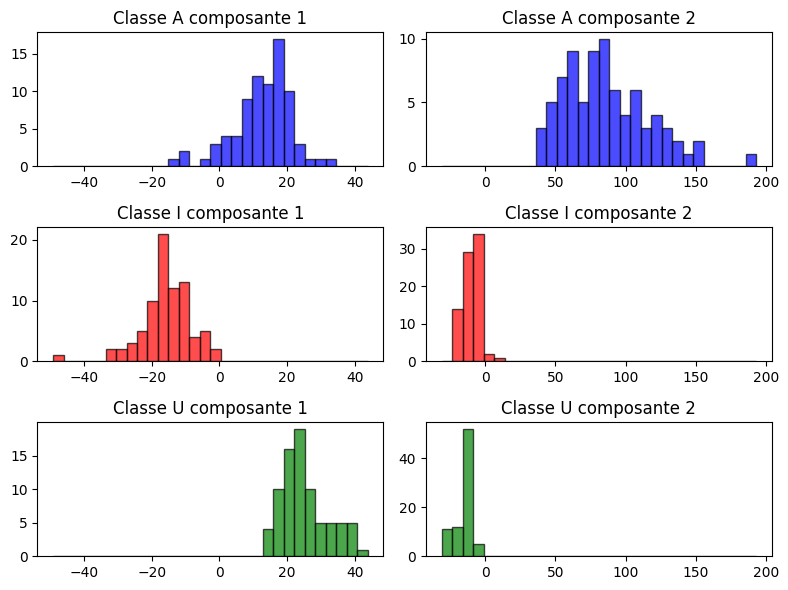

In [4]:
matrices= [app_aa,app_ii,app_uu]
legends=['A','I','U']
colors=['blue','red','green']
show_hist(matrices,legends,colors)

<div class="alert alert-block alert-info">
    
<b>Remarque 1:</b> Avec une seule composante, on ne peut pas séparer les 3 classes.
    
<b>Remarque 2:</b> On peut clairement séparer I de U par la premiere composante.
    
<b>Remarque 3:</b> On peut clairement séparer A de I et U par la seconde composante.
    

### Utilisation de lois gaussiennes

In [5]:
#3- APPRENTISSAGE : estimer les paramètres (moyenne et matrice de covariance) de chaque classe
# Quelles sont les dimensions des variables crées ; que contiennent-elles ? 

def estimate(matrices):
    '''Retourne la moyenne et la covariance de chaque composantes d'une liste de matrices'''
    return [ (np.mean(m,axis=0),np.cov(m.T)) for m in matrices]

estimated= estimate(matrices)
for i,(moy,cov) in enumerate(estimated):
    print(f'Classe {legends[i]} \nMoyenne : \n{moy}\nCovariance: \n{cov}\n---------')

Classe A 
Moyenne : 
[12.73410809 86.9221835 ]
Covariance: 
[[ 73.95541499 -74.69081838]
 [-74.69081838 912.23345829]]
---------
Classe I 
Moyenne : 
[-15.84258271  -9.71847791]
Covariance: 
[[ 57.07718836 -30.90012588]
 [-30.90012588  42.72735791]]
---------
Classe U 
Moyenne : 
[ 25.36460256 -15.63309221]
Covariance: 
[[ 45.53917015 -27.27292986]
 [-27.27292986  31.08463331]]
---------


<div class="alert alert-block alert-info">
    
Les moyennes ont deux valeurs (1 par composantes) et les covariances sont des matrices 2x2 (les variances sur la diagonales et les covariances sur l'anti-diagonale)

In [6]:
#4- RECONNAISSANCE : écrire une fonction "classer" qui renvoie la classe obtenue 
# par maximum de vraisemblance sur les lois gaussiennes estimées (modèle de chaque classe) 
# sur l'observation fournie en entrée :

def classer(x, estimated):
    '''classe l'observation dans l'une des classes selon la listes des moyennes et cov estimated'''
    d = len(estimated[0][0])  # Dimension des données
    S=[]
    for cl in range(len(estimated)):
        m,cov=estimated[cl]
        det_cov = np.linalg.det(cov)  # Déterminant 
        inv_cov = np.linalg.inv(cov)  # Inverse
        x_m=x-m
        exponent= -0.5 * np.dot(np.dot(x_m, inv_cov), x_m)
        coefficient = 1.0 / ((2 * np.pi) ** (d / 2) * np.sqrt(det_cov))
        S.append(coefficient * np.exp(exponent))
        
    return np.argmax(S) #on retourne le max


# Exemple de résultat : 
# classe = classer(tst_aa[0,:], m_aa, c_aa, m_uu, c_uu, m_ii, c_ii)
# => no_classe = 1

classe=classer(app_aa[0,:], estimated)
print(classe)

0


(20, 2)
(20, 2)
(20, 2)


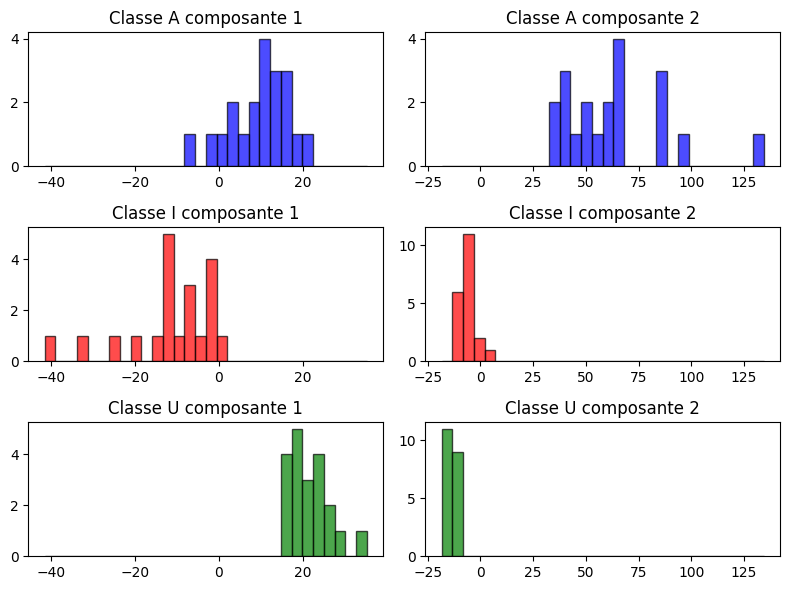

In [7]:
#5- Des observations à tester sont présentes dans le fichier Pickle suivant : TST.pkl
# Charger ces données de tests comme  pour les données d'apprentissage)
# Vérifier leur dimensions et leur contenu
f = open('TST.pkl', 'rb')
dicoTST = pickle.load(f)
tst_aa = dicoTST["aa"]
tst_ii = dicoTST["ii"]
tst_uu = dicoTST["uu"]
f.close()

# Vérifier le contenu et la taille des matrices
print(tst_aa.shape)
print(tst_ii.shape)
print(tst_uu.shape)

matrices_tst= [tst_aa,tst_ii,tst_uu]
show_hist(matrices_tst,legends,colors)

In [8]:
#6- Définir la fonction tout_tester qui effectue tous les tests de classification 
def tout_tester(X,estimated):
    return np.array([ classer(X[i,:], estimated) for i in range(X.shape[0])])
  
X_train=np.concatenate(matrices)
X_test=np.concatenate(matrices_tst)
y_train= [0]*80 + [1]*80 +[2]*80
y_test= [0]*20 + [1]*20 +[2]*20
P=tout_tester(X_test,estimated)
y_test= [0]*20 + [1]*20 + [2]*20
print(P)
print(y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


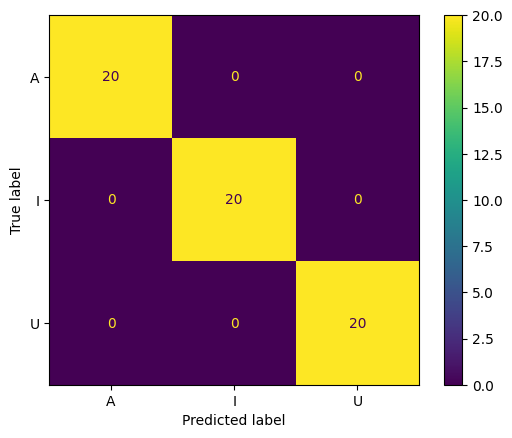

In [9]:
#7- Réaliser les tests et afficher la matrice de confusion et le taux de bonne reconnaisance correspondant 
cm = confusion_matrix(y_test,P)
disp = ConfusionMatrixDisplay(cm,display_labels=legends)
disp.plot()
print()

<div class="alert alert-block alert-success">
    
Aucune erreur, les deux composantes du cepstre sont assez discrimantes pour classifier les 3 voyelles

### Visualisation  des résultats

In [75]:
#9- Représenter en 2D et par des couleurs différentes les nuages de points correspondant 
# aux données d'apprentissage

#10- Afficher les centroïdes des différentes classes

#11- Réaliser une animation pour l'affichage des points de test (un par un avec des couleurs par exemple...)


def show_decision_boundary(X_train,X_test,y_train,y_test,estimator,label,cmap1,cmap2,cmap3,centroids,step=2):
    '''Affichage de la frontiaire de decision de la classification'''
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max]
    x_min, x_max = X_train[:, 0].min() - step, X_train[:, 0].max() + step
    y_min, y_max = X_train[:, 1].min() - step, X_train[:, 1].max() + step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = tout_tester(np.c_[xx.ravel(), yy.ravel()],estimator)
    Z = Z.reshape(xx.shape)
    
    #Drawing
    fig, ax = plt.subplots(1, 2, figsize=(15,7))
    #Frontieres
    ax[0].contourf(xx, yy, Z, cmap=cmap1,alpha=0.2,levels=len(label))
    ax[1].contourf(xx, yy, Z, cmap=cmap1,alpha=0.2,levels=len(label))
    #Legendes
    target_names = [label[y_train[i]] for i in range(len(y_train) )]
    target_names2 = [label[y_test[i]] for i in range(len(y_test) )]
    #Titres
    ax[0].set_title(f'X train')
    ax[1].set_title(f'X test')
    #Ax0 train
    sns.scatterplot(
        x=X_train[:, 0],
        y=X_train[:, 1],
        hue=target_names,
        palette=cmap2,
        alpha=1.0,
        edgecolor="black",
        ax=ax[0]
    )
    #Ax0 test
    sns.scatterplot(
        x=X_test[:, 0],
        y=X_test[:, 1],
        hue=target_names2,
        palette=cmap2,
        alpha=1.0,
        edgecolor="black",
        ax=ax[1]
    )
    ax[0].scatter(centroids[:,0],centroids[:,1],c=cmap3,marker='s',s=100,label="centroïde")
    ax[1].scatter(centroids[:,0],centroids[:,1],c=cmap3,marker='s',s=100,label="centroïde")
    ax[0].legend()
    ax[1].legend()
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

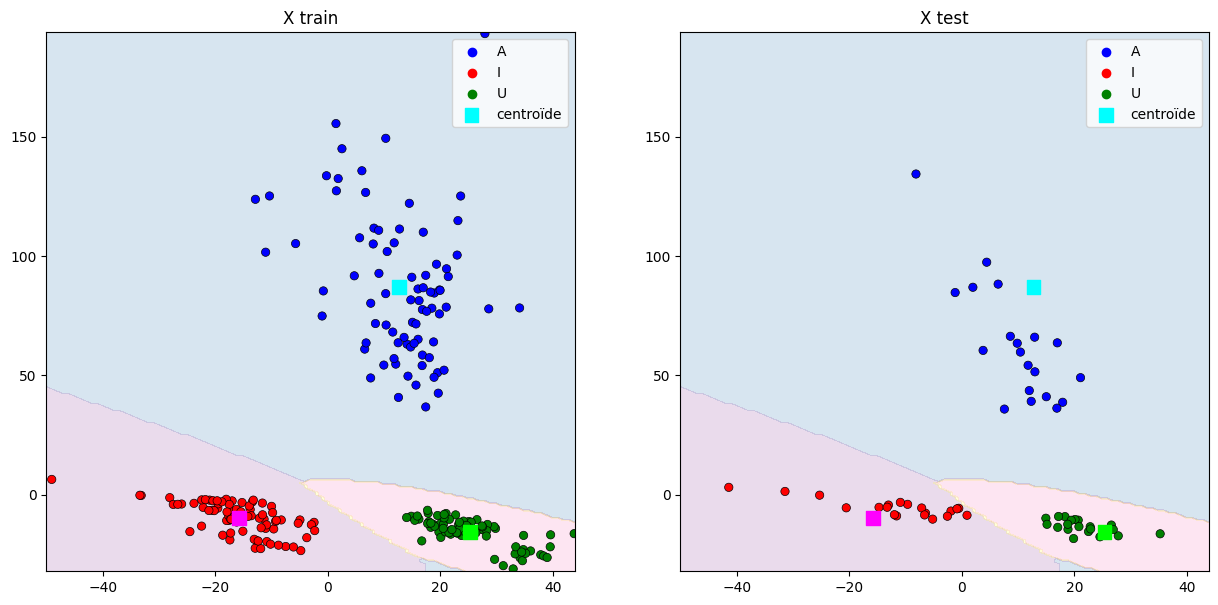

In [112]:
colors_c=["cyan","magenta","lime"]
centroids=np.array( [m for m,cov in estimated ])
show_decision_boundary(X_train,X_test,y_train,y_test,estimated,legends,plt.cm.Set1,colors,colors_c,centroids,step=1)